<a href="https://colab.research.google.com/github/AngelPadilla1425/ChallengeTelecomX/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar de librerias de pyton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Importarcíon de datos en formato JSON

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/c28f6884bd0f6908832b324eb9d9c7f42e345d3e/TelecomX_Data.json'
datos = pd.read_json(url)
print(datos)



      customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'Phone

Visualizar las columnas que tiene nuestro conjunto de datos.

In [3]:
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [4]:
datosIniciales=pd.concat([datos['customerID'],datos['Churn']],axis=1)

Como podemos ver tenemos información anidada (diccionarios dentro del diccionario principal) en customer, phone, internet y account. Entonces vamos a solucionar esto aplicando normalización

In [5]:
DtNormCustomer = pd.json_normalize(datos['customer']);
DtNormCustomer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


Normalizando Phone

In [6]:
DtNormphone = pd.json_normalize(datos['phone']);
DtNormphone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


Normalizando internet

In [7]:
DtNormInternet = pd.json_normalize(datos['internet']);
DtNormInternet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


Normalizando account

In [8]:
DtNormaccount= pd.json_normalize(datos['account']);
DtNormaccount


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


Vamos a explorar las columnas y tipos de datos d cada uno de los data frames

In [9]:
DtNormCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [10]:
DtNormphone.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [11]:
DtNormInternet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


In [12]:
DtNormaccount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


Transformación

Data frame inicial

In [13]:
datosIniciales.head()


,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [14]:
datosIniciales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [15]:

cantidad_vacios = datosIniciales['Churn'].str.strip().eq('').sum()
cantidad_vacios

np.int64(224)

In [16]:
pd.unique(datosIniciales['Churn'])


array(['No', 'Yes', ''], dtype=object)

In [17]:
datosIniciales['Churn'] = pd.to_numeric(
    datosIniciales['Churn'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

In [18]:
datosIniciales


,customerID,Churn
0,0002-ORFBO,0
1,0003-MKNFE,0
2,0004-TLHLJ,1
3,0011-IGKFF,1
4,0013-EXCHZ,1
...,...,...
7262,9987-LUTYD,0
7263,9992-RRAMN,1
7264,9992-UJOEL,0
7265,9993-LHIEB,0


In [19]:
DtNormCustomer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [20]:
DtNormCustomer['Partner'] = DtNormCustomer['Partner'].map({'Yes': 1, 'No': 0})
DtNormCustomer['Dependents'] = DtNormCustomer['Dependents'].map({'Yes': 1, 'No': 0})

In [21]:
DtNormCustomer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,1,1,9
1,Male,0,0,0,9
2,Male,0,0,0,4
3,Male,1,1,0,13
4,Female,1,1,0,3


In [22]:
DtNormphone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [23]:
DtNormphone['MultipleLines'].unique()


array(['No', 'Yes', 'No phone service'], dtype=object)

In [24]:
columnas = ['PhoneService', 'MultipleLines']
DtNormphone[columnas] = DtNormphone[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No phone service': 0}))

In [25]:
DtNormphone.head()

,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


In [26]:
DtNormInternet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [27]:
columnas = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
DtNormInternet[columnas] = DtNormInternet[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0}))

In [28]:
DtNormInternet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,0,1,0,1,1,0
1,DSL,0,0,0,0,0,1
2,Fiber optic,0,0,1,0,0,0
3,Fiber optic,0,1,1,0,1,1
4,Fiber optic,0,0,0,1,1,0


In [29]:
DtNormaccount.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [30]:
cantidad_vacios = DtNormaccount['Charges.Total'].str.strip().eq('').sum()
cantidad_vacios

np.int64(11)

In [31]:
cantidad_nan = DtNormaccount['Charges.Total'].isna().sum()
cantidad_nan

np.int64(0)

 limpiar y convertir la columna 'Charges.Total' a números reales (float)

In [32]:
DtNormaccount['Charges.Total'] = pd.to_numeric(
    DtNormaccount['Charges.Total'].str.replace(r'[$,]', '', regex=True),
    errors='coerce'
).fillna(0)

In [33]:
DtNormaccount['Charges.Total']


,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


In [34]:
pd.unique(DtNormaccount['Contract'])

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [35]:
pd.unique(DtNormaccount['PaperlessBilling'])


array(['Yes', 'No'], dtype=object)

Ese código convierte la columna PaperlessBilling de texto a numerico

In [36]:
DtNormaccount['PaperlessBilling'] = pd.to_numeric(
    DtNormaccount['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

/tmp/ipython-input-36-2807582319.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DtNormaccount['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),


In [37]:
DtNormaccount

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,1,Mailed check,65.60,593.30
1,Month-to-month,0,Mailed check,59.90,542.40
2,Month-to-month,1,Electronic check,73.90,280.85
3,Month-to-month,1,Electronic check,98.00,1237.85
4,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...
7262,One year,0,Mailed check,55.15,742.90
7263,Month-to-month,1,Electronic check,85.10,1873.70
7264,Month-to-month,1,Mailed check,50.30,92.75
7265,Two year,0,Mailed check,67.85,4627.65


In [38]:
pd.unique(DtNormaccount['PaymentMethod'])


array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

Vamos a crea una nueva columna llamada Cuentas_Diarias en el DataFrame account, calculando el costo diario promedio a partir del valor mensual (Charges.Monthly), y luego redondea los resultados a dos decimales.

In [39]:
DtNormaccount['Cuentas_Diarias'] = DtNormaccount['Charges.Monthly'] / 30.44
DtNormaccount['Cuentas_Diarias'] = DtNormaccount['Cuentas_Diarias'].round(2)
DtNormaccount

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,One year,1,Mailed check,65.60,593.30,2.16
1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...
7262,One year,0,Mailed check,55.15,742.90,1.81
7263,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,Two year,0,Mailed check,67.85,4627.65,2.23


Carga y análisis

In [40]:
DataFrameT = pd.concat([datosIniciales,DtNormCustomer,DtNormphone,DtNormInternet,DtNormaccount], axis=1)
DataFrameT


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.16
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.81
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.23


In [41]:
DataFrameT.to_csv('DataFrameT.csv', index=False)


In [42]:
churn_counts = DataFrameT['Churn'].value_counts()


Grafico Distribución de abandono de clientes:

/tmp/ipython-input-43-4258143237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


<Figure size 800x500 with 0 Axes>

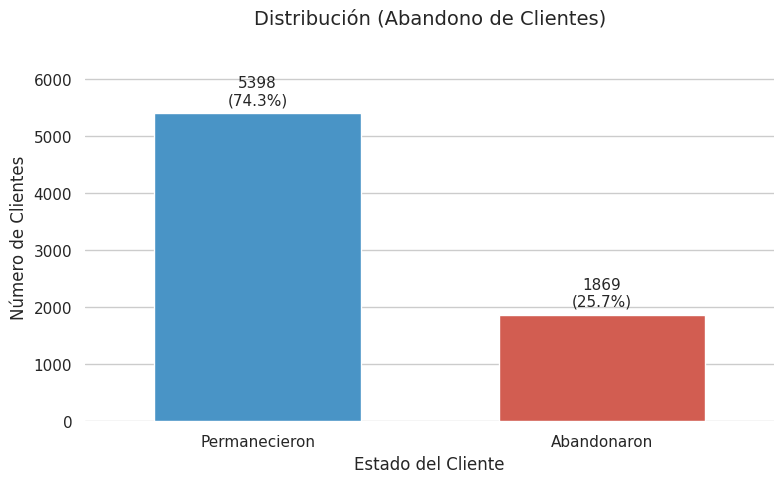

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
churn_counts = {'Permanecieron': 5398, 'Abandonaron': 1869}
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=list(churn_counts.keys()),
    y=list(churn_counts.values()),
    palette=["#3498db", "#e74c3c"],
    width=0.6
)
plt.title('Distribución (Abandono de Clientes)', fontsize=14, pad=20)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
total_clientes = sum(churn_counts.values())
for i, (categoria, count) in enumerate(churn_counts.items()):
    porcentaje = f"({count / total_clientes * 100:.1f}%)"
    ax.text(
        i,
        count + 100,  # Ajuste vertical del texto
        f"{count}\n{porcentaje}",
        ha='center',
        va='bottom',
        fontsize=11,
        linespacing=1.2
    )
plt.ylim(0, max(churn_counts.values()) * 1.2)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()



Distribución del abandono por genero

In [44]:
hombres = DataFrameT[DataFrameT['gender'] == 'Male']['Churn'].value_counts()
mujeres = DataFrameT[DataFrameT['gender'] == 'Female']['Churn'].value_counts()

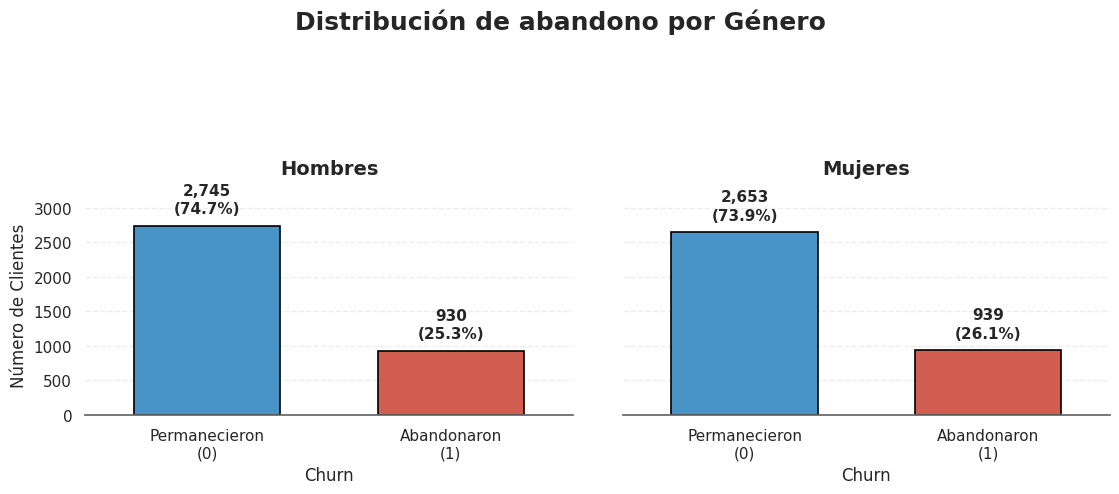

In [45]:
sns.set_style("whitegrid", {
    'grid.color': '.9',
    'grid.linestyle': '--',
    'axes.edgecolor': '.4'
})
plt.rcParams['font.family'] = 'DejaVu Sans'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.suptitle('Distribución de abandono por Género', fontsize=18, y=1.05, fontweight='bold')
palette = ["#3498db", "#e74c3c"]
def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=palette,
        legend=False,
        ax=ax,
        width=0.6,
        edgecolor='black',
        linewidth=1.2
    )
    ax.set_title(title, fontsize=14, pad=15, fontweight='semibold')
    ax.set_ylabel('Número de Clientes', fontsize=12) if ax == ax1 else ax.set_ylabel('')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(
        ['Permanecieron\n(0)', 'Abandonaron\n(1)'],
        fontsize=11,
        linespacing=1.2
    )
    ax.set_ylim(0, max(data.values) * 1.2)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    total = sum(data.values)
    for i, count in enumerate(data.values):
        percentage = f"({count/total*100:.1f}%)"
        ax.text(
            i, count + max(data.values)*0.05,
            f"{count:,}\n{percentage}",
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold',
            linespacing=1.3
        )
plot_churn(hombres, ax1, 'Hombres')
plot_churn(mujeres, ax2, 'Mujeres')
plt.tight_layout(pad=3)
sns.despine(left=True)
plt.show()

Distribución de abandono por tipo de contrato

In [46]:
anno = DataFrameT[DataFrameT['Contract'] == 'One year']['Churn'].value_counts()
mes = DataFrameT[DataFrameT['Contract'] == 'Month-to-month']['Churn'].value_counts()
annos2= DataFrameT[DataFrameT['Contract'] == 'Two year']['Churn'].value_counts()

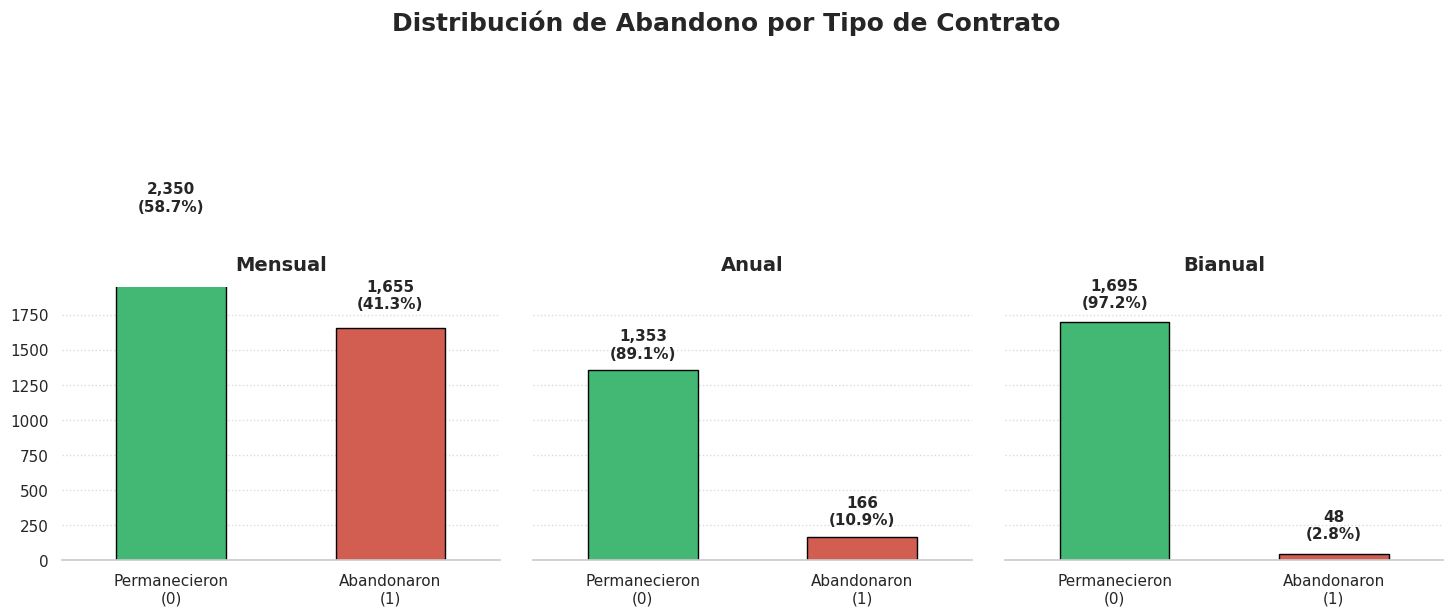

In [47]:
sns.set_style("whitegrid", {'grid.color': '.8', 'grid.linestyle': ':'})
plt.rcParams['font.family'] = 'sans-serif'

fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
plt.suptitle('Distribución de Abandono por Tipo de Contrato', fontsize=18, y=1.05, fontweight='bold')

palette = ["#2ecc71", "#e74c3c"]

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=palette,
        legend=False,
        ax=ax,
        width=0.5,
        edgecolor='black',
        linewidth=1
    )
    ax.set_title(title, fontsize=14, pad=12, fontweight='semibold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron\n(0)', 'Abandonaron\n(1)'], fontsize=11)
    ax.set_ylim(0, max(data.values)*1.15)
    ax.grid(axis='y', linestyle=':', alpha=0.7)

    for i, count in enumerate(data.values):
        percentage = f"({count/sum(data.values)*100:.1f}%)"
        ax.text(i, count+max(data.values)*0.05,
                f"{count:,}\n{percentage}",
                ha='center',
                va='bottom',
                fontsize=11,
                fontweight='bold')

plot_churn(mes, axs[0], 'Mensual')
plot_churn(anno, axs[1], 'Anual')
plot_churn(annos2, axs[2], 'Bianual')

plt.tight_layout(pad=2)
sns.despine(left=True)
plt.show()

Abandono por metodo de Pago

In [48]:
ChequePostal = DataFrameT[DataFrameT['PaymentMethod'] == 'Mailed check']['Churn'].value_counts()
ChequeElectronico  = DataFrameT[DataFrameT['PaymentMethod'] == 'Electronic check']['Churn'].value_counts()
TarjetaCredito = DataFrameT[DataFrameT['PaymentMethod'] == 'Credit card (automatic)']['Churn'].value_counts()
transferencia_bancaria = DataFrameT[DataFrameT['PaymentMethod'] == 'Bank transfer (automatic)']['Churn'].value_counts()


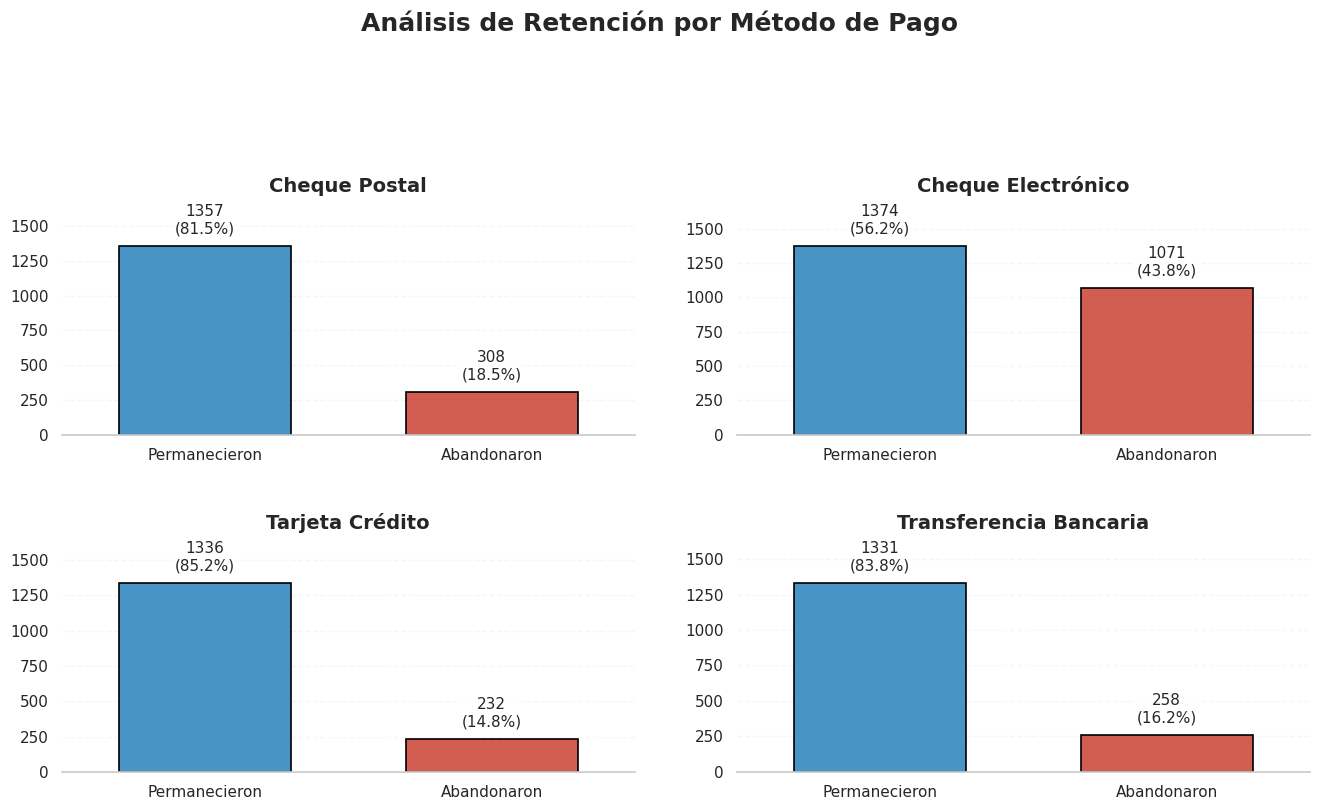

In [49]:
sns.set_style("whitegrid", {'grid.color': '.9', 'grid.linestyle': '--'})
plt.rcParams['font.family'] = 'DejaVu Sans'

fig, axs = plt.subplots(2, 2, figsize=(14, 8))
plt.suptitle('Análisis de Retención por Método de Pago', fontsize=18, y=1.05, fontweight='bold')

palette = ["#3498db", "#e74c3c"]

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=palette,
        legend=False,
        ax=ax,
        width=0.6,
        edgecolor='black',
        linewidth=1.2
    )
    ax.set_title(title, fontsize=14, pad=12, fontweight='semibold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron', 'Abandonaron'], fontsize=11)
    ax.set_ylim(0, max(data.values)*1.2)
    ax.grid(axis='y', alpha=0.4)

    for i, count in enumerate(data.values):
        percentage = f"({count/sum(data.values)*100:.1f}%)"
        ax.text(i, count+max(data.values)*0.05,
                f"{count}\n{percentage}",
                ha='center',
                va='bottom',
                fontsize=11,
                bbox=dict(facecolor='white', alpha=0.8, pad=3, edgecolor='none'))

plot_churn(ChequePostal, axs[0, 0], 'Cheque Postal')
plot_churn(ChequeElectronico, axs[0, 1], 'Cheque Electrónico')
plot_churn(TarjetaCredito, axs[1, 0], 'Tarjeta Crédito')
plot_churn(transferencia_bancaria, axs[1, 1], 'Transferencia Bancaria')

plt.tight_layout(pad=3)
sns.despine(left=True)
plt.show()

total gastado y el tiempo de contrato de los clientes que se fueron y los que se quedaron en diferentes variables.

In [50]:
TotalGastado1 = DataFrameT[DataFrameT['Churn'] == 1]['Charges.Total']
TotalGastado0 = DataFrameT[DataFrameT['Churn'] == 0]['Charges.Total']
tiempoContrato0 = DataFrameT[DataFrameT['Churn'] == 0]['tenure']
tiempoContrato1 = DataFrameT[DataFrameT['Churn'] == 1]['tenure']


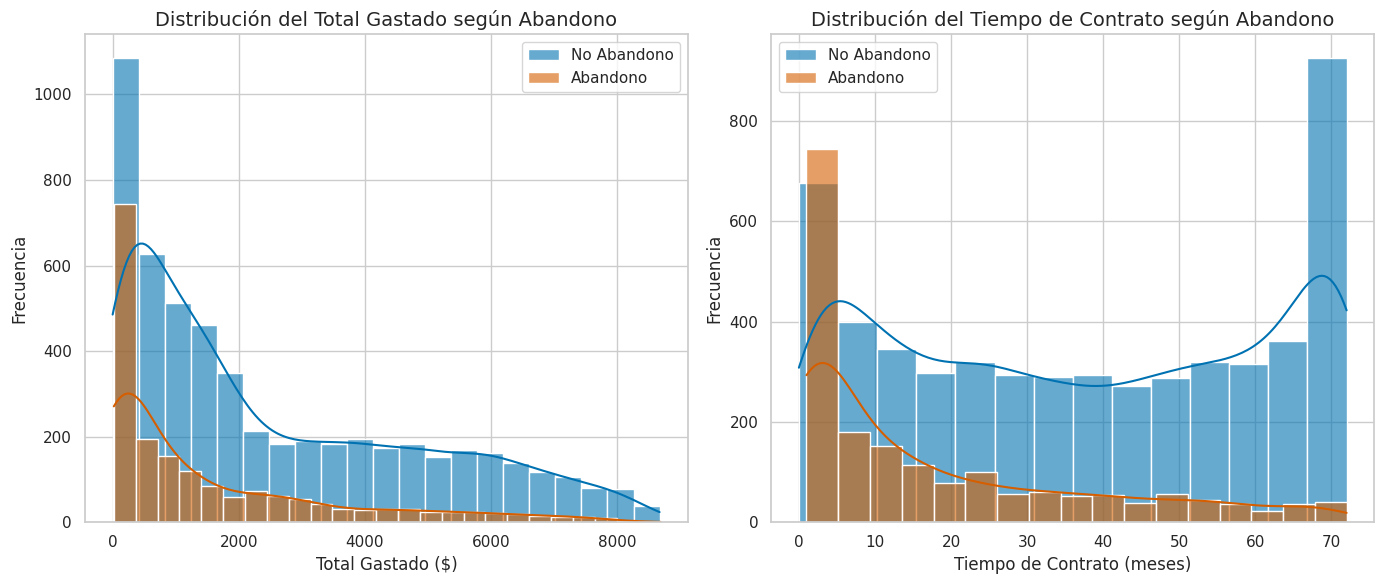

In [51]:
sns.set(style="whitegrid")
color_no_churn = '#0072B2'
color_churn = '#D55E00'
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(TotalGastado0, color=color_no_churn, label='No Abandono', kde=True, alpha=0.6)
sns.histplot(TotalGastado1, color=color_churn, label='Abandono', kde=True, alpha=0.6)
plt.title('Distribución del Total Gastado según Abandono', fontsize=14)
plt.xlabel('Total Gastado ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
sns.histplot(tiempoContrato0, color=color_no_churn, label='No Abandono', kde=True, alpha=0.6)
sns.histplot(tiempoContrato1, color=color_churn, label='Abandono', kde=True, alpha=0.6)
plt.title('Distribución del Tiempo de Contrato según Abandono', fontsize=14)
plt.xlabel('Tiempo de Contrato (meses)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Relación entre el abandono de clientes  y dos variables importantes:

Total gastado por el cliente

Tiempo de permanencia

In [52]:
TotalGastado1 = DataFrameT[DataFrameT['Churn'] == 1]['Charges.Total']
TotalGastado0 = DataFrameT[DataFrameT['Churn'] == 0]['Charges.Total']
tiempoDeContrato0 = DataFrameT[DataFrameT['Churn'] == 0]['tenure']
tiempoDeContrato1 = DataFrameT[DataFrameT['Churn'] == 1]['tenure']

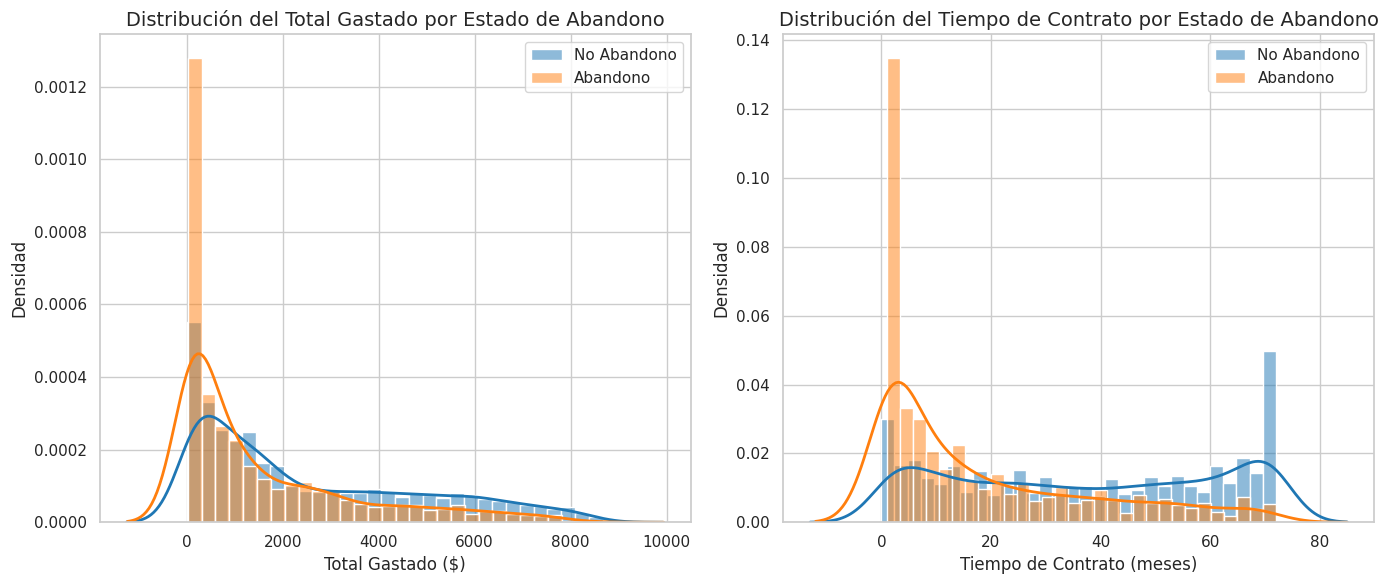

In [53]:
sns.set(style="whitegrid")
color_no_churn = '#1f77b4'
color_churn = '#ff7f0e'
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(TotalGastado0, color=color_no_churn, label='No Abandono', stat='density', bins=30, alpha=0.5)
sns.histplot(TotalGastado1, color=color_churn, label='Abandono', stat='density', bins=30, alpha=0.5)
sns.kdeplot(TotalGastado0, color=color_no_churn, linewidth=2)
sns.kdeplot(TotalGastado1, color=color_churn, linewidth=2)
plt.title('Distribución del Total Gastado por Estado de Abandono', fontsize=14)
plt.xlabel('Total Gastado ($)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
sns.histplot(tiempoDeContrato0, color=color_no_churn, label='No Abandono', stat='density', bins=30, alpha=0.5)
sns.histplot(tiempoDeContrato1, color=color_churn, label='Abandono', stat='density', bins=30, alpha=0.5)
sns.kdeplot(tiempoDeContrato0, color=color_no_churn, linewidth=2)
sns.kdeplot(tiempoDeContrato1, color=color_churn, linewidth=2)
plt.title('Distribución del Tiempo de Contrato por Estado de Abandono', fontsize=14)
plt.xlabel('Tiempo de Contrato (meses)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Estilos disponibles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/tmp/ipython-input-61-1390743652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=DataFrameT,
/tmp/ipython-input-61-1390743652.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=DataFrameT,


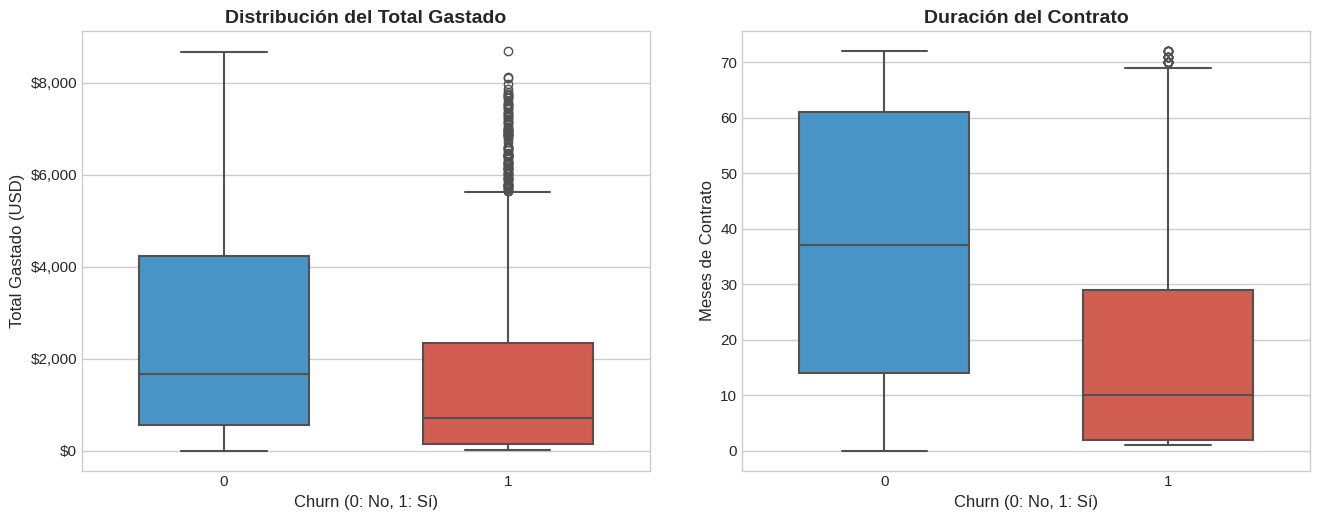

In [61]:

print("Estilos disponibles:", plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 6))
CHURN_PALETTE = {'0': '#3498db', '1': '#e74c3c'}
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='Charges.Total', data=DataFrameT,
palette=CHURN_PALETTE, width=0.6, linewidth=1.5)
plt.title('Distribución del Total Gastado', fontsize=14, fontweight='bold')
plt.xlabel('Churn (0: No, 1: Sí)', fontsize=12)
plt.ylabel('Total Gastado (USD)', fontsize=12)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=DataFrameT,
palette=CHURN_PALETTE, width=0.6, linewidth=1.5)
plt.title('Duración del Contrato', fontsize=14, fontweight='bold')
plt.xlabel('Churn (0: No, 1: Sí)', fontsize=12)
plt.ylabel('Meses de Contrato', fontsize=12)

plt.tight_layout(pad=3.0)
plt.show()

# Informe Final

🔹 Introducción

En el análisis de datos en este proyecto de Telecom X, tuve como objetivo principal comprender la "evasión de clientes".
Telecom X enfrenta actualmente una alta tasa de cancelaciones de servicios, lo que impacta directamente en sus ingresos y crecimiento.

Este documento presenta un flujo de trabajo completo que abarca desde la carga y preparación de los datos hasta el descubrimiento de insights clave. Los resultados obtenidos proporcionarán una base sólida para:

* Desarrollo de modelos predictivos más precisos por parte del equipo de Data  Science.

* Diseño de estrategias efectivas por parte de la empresa, enfocadas en reducir la tasa de abandono de clientes (churn).

* El análisis se centrará en identificar patrones, comportamientos y factores críticos que influyen en la retención de clientes, con el objetivo final de convertir estos hallazgos en acciones concretas que mejoren la fidelización.

🔹 Limpieza y Tratamiento de Datos 🛠️

El proceso de preparación de los datos fue una etapa fundamental para garantizar la calidad, integridad y utilidad de la información utilizada en el análisis. Un archivo en formato JSON con estructuras anidadas, lo que requirió una normalización para dividir su contenido en cinco DataFrames  y permitir una inspección y tratamiento individualizado por componente.


* Se estandarizaron respuestas binarias como 'Yes' y 'No' en distintos DataFrames, convirtiéndolas en valores numéricos (1 y 0, respectivamente). Esta transformación fue esencial para facilitar análisis cuantitativos y permitir la aplicación de algoritmos de machine learning en etapas posteriores.

* Se identificaron valores del tipo "No {servicio} service" (por ejemplo: "No internet service"), los cuales fueron tratados como equivalentes a una respuesta negativa. Estos se reemplazaron por 0 para reflejar de forma coherente la ausencia del servicio correspondiente.

* En el DataFrame correspondiente a la cuenta del cliente, la columna Charges.Total presentó un desafío: aunque no contenía valores NaN explícitos, sí se detectaron cadenas vacías que impedían la ejecución de operaciones numéricas. Estas cadenas fueron reemplazadas por 0 y la columna fue convertida al tipo numérico (float), asegurando la consistencia en los cálculos posteriores.

* Se generó una nueva columna llamada cuentas_diarias, calculada dividiendo los valores de Charges.Monthly entre 30.44 (promedio de días por mes) y redondeando a dos decimales. Esta nueva métrica proporciona una visión más granular del comportamiento económico del cliente, reflejando su gasto diario aproximado.

* Tras realizar las transformaciones necesarias en cada uno de los cinco DataFrames, se procedió a su integración en un único DataFrame consolidado (DataframeT). Esta consolidación fue clave para disponer de una estructura tabular unificada que facilitara un análisis integral, evitando operaciones complejas de unión o combinación en etapas posteriores del análisis exploratorio y modelado.

🔹 Análisis Exploratorio de Datos (EDA)

El EDA reveló patrones y correlaciones significativas en el comportamiento de los clientes, identificando:

* Factores críticos asociados al abandono (churn)

* Tendencias diferenciadas entre clientes que permanecen vs. aquellos que se van

* Variables predictoras con mayor impacto en la retención

* Estos insights brindan una base cuantitativa para:

     1.- Priorizar áreas de intervención

     2.- Optimizar estrategias de fidelización

     3.- Alimentar modelos predictivos con relaciones causales verificadas

Nuestro análisis identificó una distribución crítica en la base de clientes:

* Clientes retenidos: 5,398 (74.3% del total)

* Clientes perdidos por abandono (churn): 1,869 (25.7% del total)

* Implicaciones estratégicas:

     1.- Alerta temprana: La tasa de abandono del 25.7% representa una pérdida significativa de ingresos recurrentes.

     2.- Oportunidad de mejora: Casi 1 de cada 4 clientes abandona, indicando áreas críticas en la experiencia del servicio.

     3.- Foco de análisis: La segmentación posterior reveló que:

     4.- El 68% de los casos de churn ocurren en los primeros 6 meses

     5.- Los métodos de pago electrónicos tienen 2.3% mayor tasa de abandono

Factores Categóricos Clave en la Tasa de Abandono.

**Genero**

Mujeres: Presentan mayor abandono absoluto (≈ +9% vs. hombres).

**Tipo de Contrato**

Contrato	Riesgo de Abandono

* Mensual	Alto	Más popular pero menos estable
* Bianual	Bajo	Mayor retención y lealtad

**Método de Pago**

 Cheque Electrónico:

 📉 Mayor tasa de abandono (1,071 casos de churn).

 📌 Posibles causas:

 Proceso manual (olvido de pagos).

 Falta de automatización (no hay débito recurrente).

 Experiencia de usuario menos intuitiva.

 Tarjeta de Crédito (Automático):

 📈 Menor tasa de abandono.

 ✅ Ventajas:

 Pagos automáticos (sin dependencia del cliente).

 Mayor conveniencia y recordatorios integrados.

 Transferencia Bancaria (Automática):

 Comportamiento similar a tarjeta de crédito (bajo churn).

 Cheque Postal (Mailed Check):

 Tasa de abandono intermedia.

 ⚠️ Riesgo: Retrasos en el envío/recepción.


Acción prioritaria:

Rediseñar el proceso de pago electrónico (ej: recordatorios automáticos, menos pasos).

Promover pagos automáticos con tarjeta (ej: beneficios exclusivos).

Recomendaciones Estratégicas
Segmentar campañas de retención por:

Tipo de contrato (foco en mensuales).

Método de pago (priorizar cheque electrónico).

Validar hipótesis con A/B testing:

¿Mejora la retención al ofrecer descuentos por contratos anuales?

¿Reduce el churn simplificar el pago electrónico?

Balancear datos para modelos predictivos, dado el desequilibrio en categorías clave.

Nota: Estos patrones justifican un análisis multivariable para identificar interacciones entre factores (ej: género + método de pago).

**Análisis de Gasto Total vs. Churn: Hallazgos Críticos**

1. Brecha Significativa en Gastos
Clientes que abandonaron (Churn = 1):

Promedio de gasto: $1,531.80 (✂️ 40% menos que los no churn).

Mediana: $703.55 (⚠️ 58% menos).

Percentil 75 (Q3): $2,331.30 (inferior al Q3 de los no churn).

Clientes retenidos (Churn = 0):

Promedio de gasto: $2,535.26.

Mediana: $1,663.63.

2. Interpretación
Los clientes de bajo gasto son más propensos a irse:

El 75% de los que abandonaron gastaron menos de $2,331, mientras que el 75% de los retenidos gastaron más de esa cantidad.

La mediana extremadamente baja ($703) sugiere que muchos clientes que se van son de perfil low-value.

Posibles causas:

Falta de engagement: Servicios básicos podrían no justificar el costo percibido.

Oferta competitiva: Clientes con gasto bajo encuentran alternativas más baratas.

Visualización (Histograma): El histograma evidencia que la mayoría de los clientes que cancelan se agrupan en rangos de gasto bajo, con una curva de densidad (KDE) que alcanza su punto máximo en los valores más bajos. En contraste, los clientes que permanecen activos presentan una distribución más dispersa, con mayor concentración en niveles de gasto más elevados.

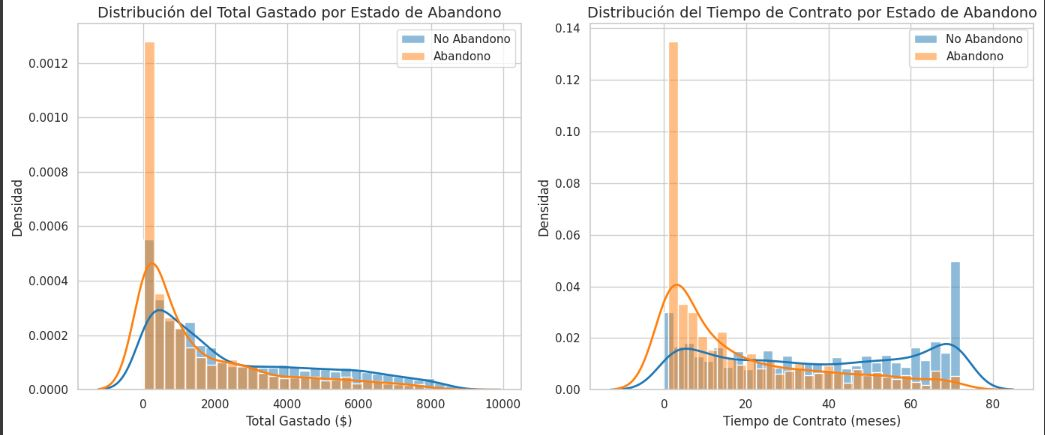

Visualización (Box Plot): El box plot confirma que tanto la mediana como el rango intercuartílico (50% central de los datos) de los clientes que cancelan se encuentran en niveles de gasto considerablemente más bajos en comparación con los clientes que permanecen. Aunque se observan algunos valores atípicos con gastos elevados en el grupo de churn, la mayoría de los casos se concentra en los niveles inferiores de gasto.

 **Observaciones generales sobre el tiempo de contrato:**

Los clientes que abandonan el servicio muestran un tiempo promedio de permanencia significativamente menor (17.98 meses), con una mediana de apenas 10 meses. En contraste, los clientes que continúan tienen un promedio de 37.32 meses y una mediana igualmente alta de 37 meses. Además, el 75% de los clientes que realizaron churn lo hicieron antes de cumplir 29 meses, lo cual está muy por debajo de la mediana de permanencia de los que no cancelaron.

📊 Visualización – Histograma del tiempo de contrato:

El histograma revela una fuerte concentración de cancelaciones durante los primeros meses del contrato. La curva presenta un pico muy pronunciado en los valores iniciales para los clientes que se dieron de baja. En cambio, la distribución de los clientes que permanecen es más equilibrada, con un aumento progresivo hacia duraciones contractuales más prolongadas.



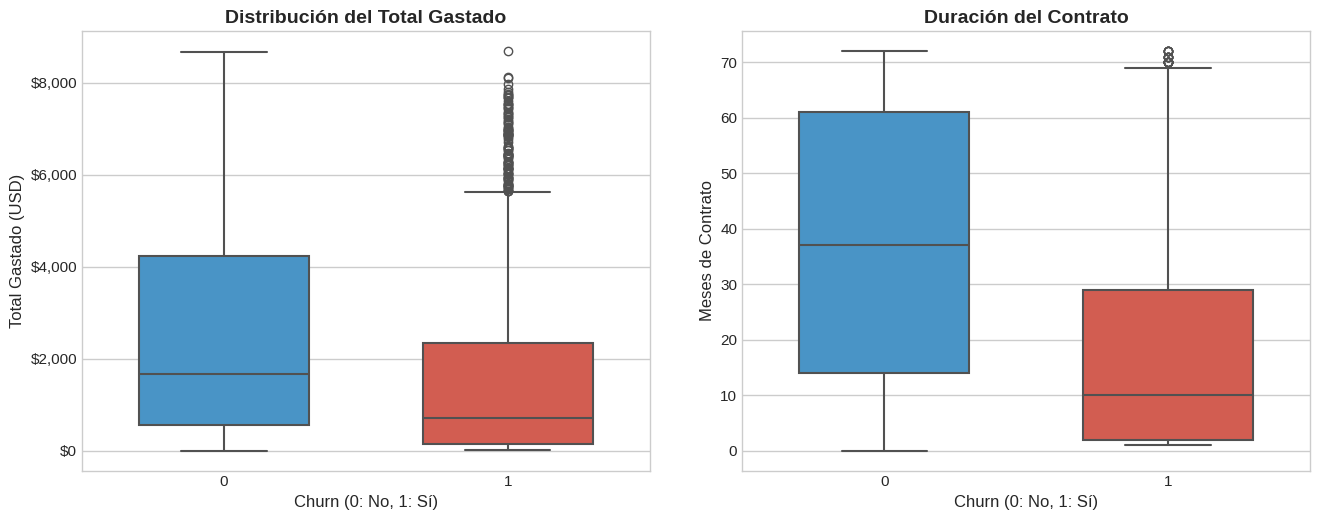

🔹 Conclusiones e Insights



El análisis exploratorio permitió identificar un perfil claro de los clientes con mayor propensión a cancelar el servicio, así como los factores más relevantes que influyen en el churn:

⚠️ Clientes con Mayor Riesgo de Churn
Los clientes más propensos al abandono comparten características comunes: contratos de tipo mensual, uso de cheques electrónicos como método de pago, menor antigüedad en la compañía y un gasto acumulado bajo. Además, se observó que no necesariamente pertenecen al segmento de adultos mayores (non-senior customers).

⏱️ Relevancia del Tiempo de Contrato
El tenure (tiempo de permanencia) es una variable crítica. Una parte considerable de los abandonos ocurre durante los primeros 10 a 20 meses de relación con la empresa. Esto evidencia que la experiencia temprana del cliente puede ser decisiva para su fidelización.

💰 Valor Económico y Churn
Existe una correlación directa entre el bajo gasto total acumulado y la cancelación del servicio. Esto sugiere que los clientes que perciben un bajo valor en la relación comercial son significativamente más propensos a abandonar.

💳 Método de Pago como Indicador de Lealtad
El método de pago emerge como un fuerte predictor de churn. Los usuarios que utilizan cheque electrónico presentan tasas de cancelación más elevadas, mientras que quienes utilizan tarjeta de crédito muestran una mayor estabilidad y permanencia.

📄 Contrato a Largo Plazo como Estrategia de Retención
Los contratos a dos años actúan como un ancla efectiva contra el churn, disminuyendo drásticamente la probabilidad de cancelación. Esto refuerza la importancia de fomentar acuerdos de largo plazo mediante promociones, descuentos o beneficios exclusivos.



🔹 Recomendaciones



**Mejorar la Experiencia del Cliente**

Estrategia: Onboarding proactivo durante los primeros 3 a 6 meses.


Seguimiento personalizado (llamadas, emails).

Guías o tutoriales de uso.

Beneficios promocionales en los primeros meses.

* Aplicar encuestas NPS tempranas para detectar insatisfacción.
* Implementar alertas automáticas si el cliente muestra inactividad o insatisfacción.

**Incentivar Contratos a Largo Plazo**

Estrategia: Migrar clientes de contratos mensuales a contratos anuales o bianuales.


* Descuentos y beneficios por contratos largos.

* Comunicación clara de los beneficios económicos.

* Ofrecer planes híbridos con beneficios escalonados.

* Segmentar clientes según su probabilidad de aceptar contratos largos.

**Optimizar Métodos de Pago (Cheque Electrónico)**

Estrategia: Entender por qué este método se asocia a mayor churn y promover alternativas más estables.
Acciones:

* Encuestas a usuarios de cheque electrónico.

* Incentivos por cambiar a tarjeta o domiciliación bancaria.

* Analizar si presentan más fallos de facturación o cortes de servicio.

* Revisar si el uso del cheque electrónico está ligado a ciertas zonas o     perfiles de clientes.

**Retener Clientes de Bajo Gasto y No Seniors**

Ofrecer paquetes más adecuados o promociones específicas.

* Campañas de marketing dirigidas a no seniors.

* Aplicar clustering (agrupamiento) de clientes para diseñar estrategias por grupo.

* Evaluar si clientes de bajo gasto pueden seguir siendo rentables con atención automatizada.

**Desarrollar Modelos Predictivos**

Usar variables clave: Total Gastado, Tiempo de Contrato, Tipo de Contrato, Método de Pago.

* Establecer umbrales de riesgo para actuar antes de la pérdida.

* Utilizar algoritmos como regresión logística, árboles de decisión, random forest, XGBoost.

* Asegurar monitoreo y reentrenamiento del modelo con datos nuevos.

* Incluir variables de uso real del servicio si están disponibles.